# **Heart Disease Prediction**

## Exercise 1

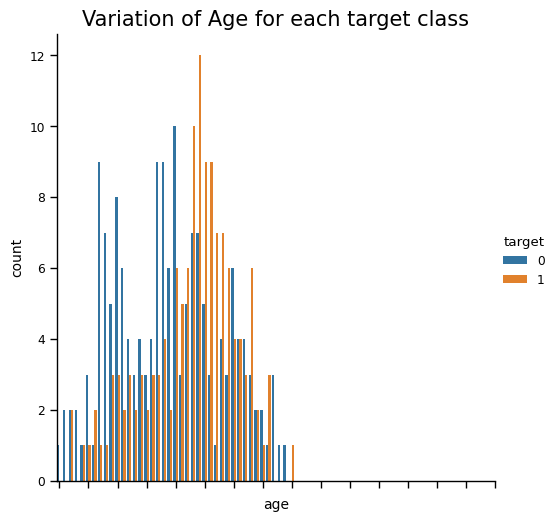

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math

df = pd.read_csv('./cleveland.csv', header = None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# distribution of target vs age

sns.set_context("paper", font_scale=1, rc={"font.size": 3, "axes.titlesize": 15, "axes.labelsize": 10})
ax = sns.catplot(kind='count', data=df, x='age', hue='target', order=df['age'].sort_values().unique())
ax.set(xticklabels=[])
ax.ax.set_xticks(np.arange(0, 80, 5))
plt.title('Variation of Age for each target class')
plt.show()


## Exercise 2

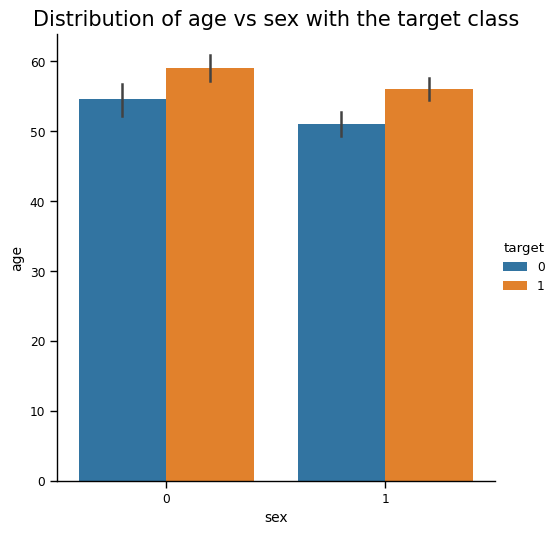

In [2]:
sns.catplot(kind='bar', data=df, y='age', x='sex', hue='target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

## Exercise 3: KNN

In [3]:
# Defining Feature and Target Variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

# Fitting the Model
classifier.fit(X_train, y_train)

# Predicting Test and Train Results
y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
cm_train = confusion_matrix(y_pred_train, y_train)

# Accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Outputting the Results
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


Question 1: A

## Exercise 4: SVM

In [4]:
# Defining Feature and Target Variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC

# Defining and Training the SVC Model
classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(X_train, y_train)

# Predicting the Test Set Results
y_pred = classifier.predict(X_test)

# Confusion Matrix for the Test and Train Sets
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

# Accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Outputting the Results
print('Accuracy for training set for SVC = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVC = {}'.format(accuracy_for_test))


Accuracy for training set for SVC = 0.66
Accuracy for test set for SVC = 0.67


Question 2: B

## Exercise 5: Naive Bayes

In [5]:
# Defining Feature and Target Variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importing and Defining the Model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

# Training the Model
classifier.fit(X_train, y_train)

# Predicting the Test Set Results
y_pred = classifier.predict(X_test)

# Confusion Matrix for Test and Train Sets
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

# Accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Outputting the Results

print('Accuracy for training set for GaussianNB = {}'.format(accuracy_for_train))
print('Accuracy for test set for GaussianNB = {}'.format(accuracy_for_test))


Accuracy for training set for GaussianNB = 0.85
Accuracy for test set for GaussianNB = 0.84


Question 3: C

## Exercise 6: Decision Tree

In [6]:
# Defining Feature and Target Variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importing and Defining the Model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)

# Training the Model
classifier.fit(X_train, y_train)

# Predicting the Test Set Results
y_pred = classifier.predict(X_test)

# Confusion Matrix for Test and Train Sets
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

# Accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Outputting the Results

print('Accuracy for training set for DecisionTreeClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for DecisionTreeClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for DecisionTreeClassifier = 1.0
Accuracy for test set for DecisionTreeClassifier = 0.75


Question 4: D

## Exercise 7: Random Forest

In [7]:
# Defining Feature and Target Variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importing and Defining the Model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42)

# Training the Model
classifier.fit(X_train, y_train)

# Predicting the Test Set Results
y_pred = classifier.predict(X_test)

# Confusion Matrix for Test and Train Sets
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

# Accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Outputting the Results
print('Accuracy for training set for RandomForestClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for RandomForestClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for RandomForestClassifier = 0.98
Accuracy for test set for RandomForestClassifier = 0.8


Question 5: A

## Exercise 8: Adaboost

In [8]:
# Defining Feature and Target Variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importing and Defining the Model
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42)

# Training the Model
classifier.fit(X_train, y_train)

# Predicting the Test Set Results
y_pred = classifier.predict(X_test)

# Confusion Matrix for Test and Train Sets
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

# Accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Outputting the Results
print('Accuracy for training set for AdaBoostClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for AdaBoostClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for AdaBoostClassifier = 0.91
Accuracy for test set for AdaBoostClassifier = 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Question 6: B

## Exercise 9: GradientBoost

In [9]:
# Defining Feature and Target Variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importing and Defining the Model
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42)

# Training the Model
classifier.fit(X_train, y_train)

# Predicting the Test Set Results
y_pred = classifier.predict(X_test)

# Confusion Matrix for Test and Train Sets
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

# Accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Outputting the Results
print('Accuracy for training set for GradientBoostingClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for GradientBoostingClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for GradientBoostingClassifier = 1.0
Accuracy for test set for GradientBoostingClassifier = 0.85


Question 7: C

## Exercise 10: XGboost

In [10]:
# Defining Feature and Target Variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importing and Defining the Model
from xgboost import XGBClassifier
classifier = XGBClassifier(objective="binary:logistic", n_estimators=100, random_state=42)

# Training the Model
classifier.fit(X_train, y_train)

# Predicting the Test Set Results
y_pred = classifier.predict(X_test)

# Confusion Matrix for Test and Train Sets
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

# Accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Outputting the Results
print('Accuracy for training set for XGBClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for XGBClassifier = {}'.format(accuracy_for_test))

Accuracy for training set for XGBClassifier = 1.0
Accuracy for test set for XGBClassifier = 0.87


Question 8: C

## Exercise 11: Stacking

In [11]:
# Defining Feature and Target Variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Importing and Defining the Base Models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)
# xgb = XGBClassifier(random_state=42)

clf = [('dtc', dtc), ('rfc', rfc), ('knn', knn), ('gc', gc), ('ad', ad), ('svc', svc)]

# Importing and Defining the Model
from sklearn.ensemble import StackingClassifier
xg = XGBClassifier()
classifier = StackingClassifier(estimators=clf, final_estimator=xg)

# Training the Model
classifier.fit(X_train, y_train)

# Predicting the Test Set Results
y_pred = classifier.predict(X_test)

# Confusion Matrix for Test and Train Sets
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

# Accuracy
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

# Outputting the Results
print('Accuracy for training set for StackingClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for StackingClassifier = {}'.format(accuracy_for_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Accuracy for training set for StackingClassifier = 0.92
Accuracy for test set for StackingClassifier = 0.9


Question 9: A